In [1]:
import os
import numpy as np
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:
data_path = "C:\\Users\\Owner6\\workspace\\midterm\\after_data"

test_path = os.path.join(data_path, 'test')

test_len = len(os.listdir( os.path.join( test_path, 'normal' ) )) +\
    len(os.listdir( os.path.join( test_path, 'bacteria' ) )) +\
    len(os.listdir( os.path.join( test_path, 'virus' ) )) +\
    len(os.listdir( os.path.join( test_path, 'covid' ) ))

print(f'test : {test_len}')

test : 3286


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(rescale=1./255)

data_200 = data_gen.flow_from_directory(
    test_path, class_mode='categorical', color_mode='rgb', shuffle=False,
    target_size=(200,200), batch_size=3286 # 3286 = 31 * 106
)

data_256 = data_gen.flow_from_directory(
    test_path, class_mode='categorical', color_mode='rgb', shuffle=False,
    target_size=(256,256), batch_size=3286 # 3286 = 31 * 106
)

X_200, y_200 = data_200.next()
y_200 = np.argmax(y_200, axis=-1)

X_256, y_256 = data_256.next()
y_256 = np.argmax(y_256, axis=-1)

X_200.shape, y_200.shape, X_256.shape, y_256.shape

Found 3286 images belonging to 4 classes.
Found 3286 images belonging to 4 classes.


((3286, 200, 200, 3), (3286,), (3286, 256, 256, 3), (3286,))

In [4]:
from tensorflow.keras.models import load_model

model1 = load_model('model/1/08-0.92584.h5')
model2 = load_model('model/2/05-0.92827.h5')
model3 = load_model('model/3/17-0.91976.h5')
model5 = load_model('model/5/16-0.91915.h5')
model6 = load_model('model/6/09-0.92036.h5')

In [7]:
predict1 = np.argmax(model1.predict(X_200), axis=-1)
predict2 = np.argmax(model2.predict(X_200), axis=-1)
predict3 = np.argmax(model3.predict(X_256), axis=-1)
predict5 = np.argmax(model5.predict(X_200), axis=-1)
predict6 = np.argmax(model6.predict(X_200), axis=-1)

In [8]:
data_200.class_indices, data_256.class_indices

({'bacteria': 0, 'covid': 1, 'normal': 2, 'virus': 3},
 {'bacteria': 0, 'covid': 1, 'normal': 2, 'virus': 3})

In [9]:
labels = list(data_200.class_indices.keys())

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

def print_scores(y, predict_y, model="model"):
    print(f"{model}'s accuracy : {accuracy_score(y, predict_y)}")

In [18]:
print_scores(y_200, predict1, 'model1')
print_scores(y_200, predict2, 'model2')
print_scores(y_256, predict3, 'model3')
print_scores(y_200, predict5, 'model5')
print_scores(y_200, predict6, 'model6')

model1's accuracy : 0.9257455873402313
model2's accuracy : 0.9248326232501521
model3's accuracy : 0.9147900182592819
model5's accuracy : 0.9181375532562386
model6's accuracy : 0.9190505173463177


In [12]:
import itertools
import matplotlib.pyplot as plt
# confusion matrix를 그려주는 함수
def plot_confusion_matrix(con_mat, labels, title='Confusion Matrix', cmap=plt.cm.get_cmap('Blues'), normalize=False):
    plt.imshow(con_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    marks = np.arange(len(labels))
    nlabels = []
    for k in range(len(con_mat)):
        n = sum(con_mat[k])
        nlabel = '{0}(n={1})'.format(labels[k],n)
        nlabels.append(nlabel)
    plt.xticks(marks, labels)
    plt.yticks(marks, nlabels)

    thresh = con_mat.max() / 2.
    if normalize:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, '{:.2f}%'.format(con_mat[i, j] * 100 / n), horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    else:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, con_mat[i, j], horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

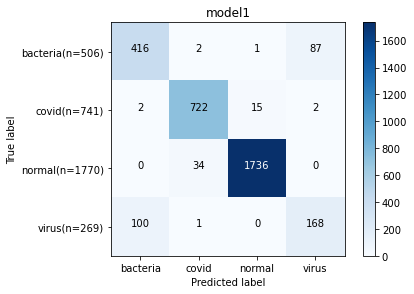

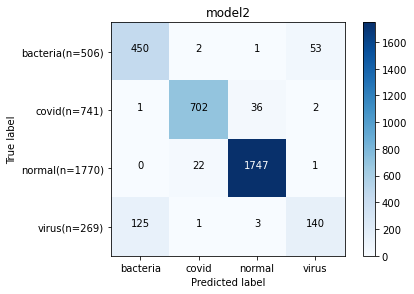

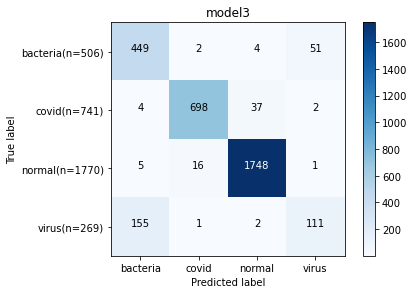

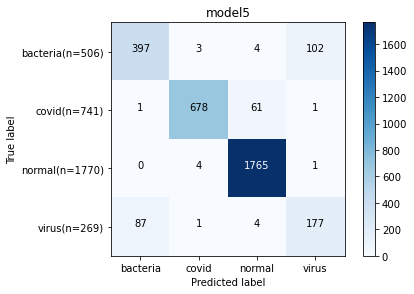

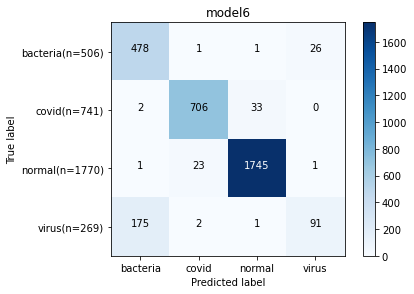

In [13]:
conf_mat = confusion_matrix(y_200, predict1)
plot_confusion_matrix(conf_mat, labels=labels, title='model1', normalize=False)
conf_mat = confusion_matrix(y_200, predict2)
plot_confusion_matrix(conf_mat, labels=labels, title='model2', normalize=False)
conf_mat = confusion_matrix(y_256, predict3)
plot_confusion_matrix(conf_mat, labels=labels, title='model3', normalize=False)
conf_mat = confusion_matrix(y_200, predict5)
plot_confusion_matrix(conf_mat, labels=labels, title='model5', normalize=False)
conf_mat = confusion_matrix(y_200, predict6)
plot_confusion_matrix(conf_mat, labels=labels, title='model6', normalize=False)

In [14]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# roc curve 그려주고 auc score 구하는 함수
def plot_roc_curve(fper, tper, title="Receiver Operating Characteristic Curve"):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()
    print(f"{title} auc score : {auc(fper, tper)}")


In [15]:
def trans_for_roc(y, predict):
    bacteria_y = y.copy()
    bacteria_y[bacteria_y != 0] = 1
    bacteria_predict = predict.copy()
    bacteria_predict[bacteria_predict != 0] = 1

    covid_y = y.copy()
    covid_y[covid_y != 1] = 0
    covid_predict = predict.copy()
    covid_predict[covid_predict != 1] = 0

    normal_y = y.copy()
    normal_y[normal_y != 2] = 0
    normal_y[normal_y == 2] = 1
    normal_predict = predict.copy()
    normal_predict[normal_predict != 2] = 0
    normal_predict[normal_predict == 2] = 1

    virus_y = y.copy()
    virus_y[virus_y != 3] = 0
    virus_y[virus_y == 3] = 1
    virus_predict = predict.copy()
    virus_predict[virus_predict != 3] = 0
    virus_predict[virus_predict == 3] = 1

    return bacteria_y, bacteria_predict, covid_y, covid_predict, normal_y, normal_predict, virus_y, virus_predict


In [20]:
def plot_roc_curves(bacteria_y, bacteria_predict, covid_y, covid_predict, normal_y, normal_predict, virus_y, virus_predict, title="model"):
    fper, tper, thresholds = roc_curve(bacteria_y, bacteria_predict)
    plot_roc_curve(fper, tper, title=f'{title} bacteria roc')
    fper, tper, thresholds = roc_curve(covid_y, covid_predict)
    plot_roc_curve(fper, tper, title=f'{title} covid roc')
    fper, tper, thresholds = roc_curve(normal_y, normal_predict)
    plot_roc_curve(fper, tper, title=f'{title} normal roc')
    fper, tper, thresholds = roc_curve(virus_y, virus_predict)
    plot_roc_curve(fper, tper, title=f'{title} virus roc')


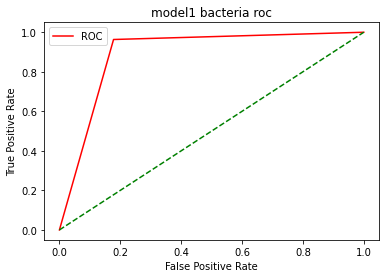

model1 bacteria roc auc score : 0.8927218699348821


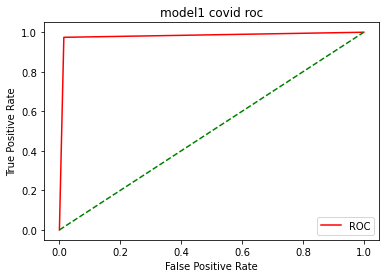

model1 covid roc auc score : 0.9799103319732003


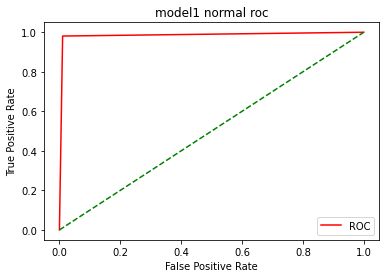

model1 normal roc auc score : 0.9851184353711073


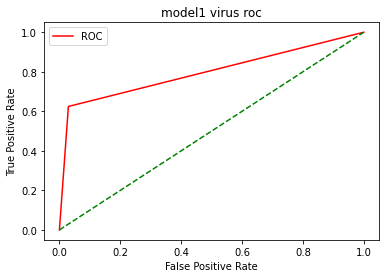

model1 virus roc auc score : 0.797517906583881


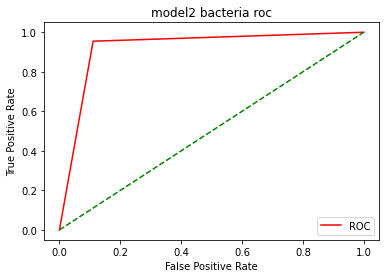

model2 bacteria roc auc score : 0.9220021611169562


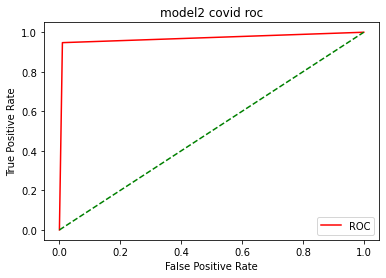

model2 covid roc auc score : 0.9687726191707166


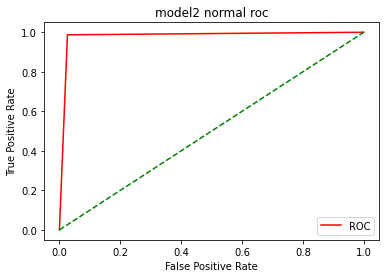

model2 normal roc auc score : 0.9803102127215538


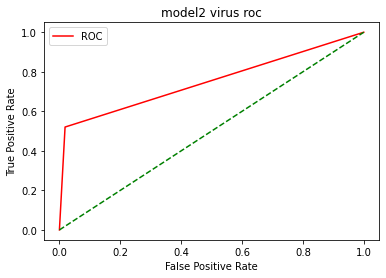

model2 virus roc auc score : 0.7509423058677407


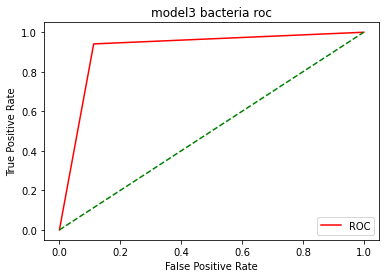

model3 bacteria roc auc score : 0.9141794864503654


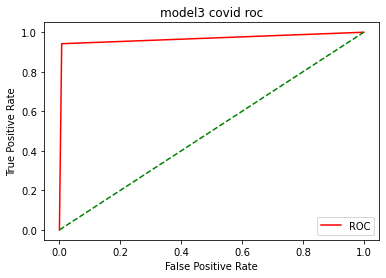

model3 covid roc auc score : 0.9672523457654262


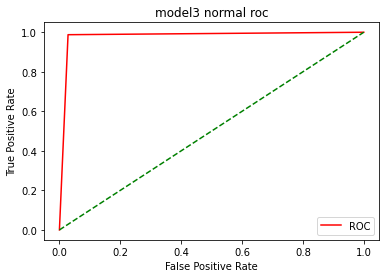

model3 normal roc auc score : 0.9796032526869699


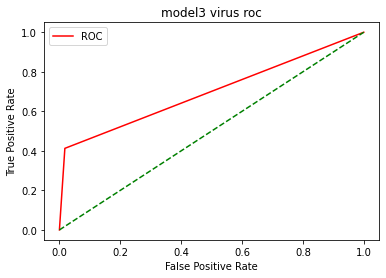

model3 virus roc auc score : 0.6973704152306694


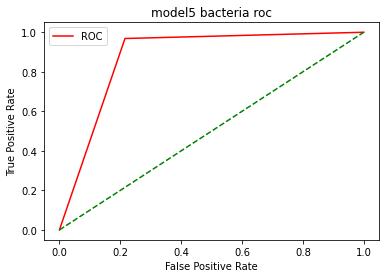

model5 bacteria roc auc score : 0.8764651519890807


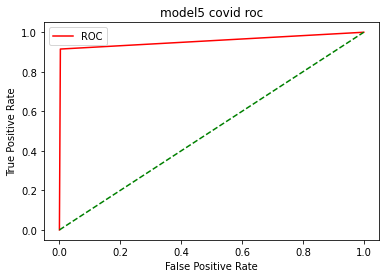

model5 covid roc auc score : 0.9559181693087184


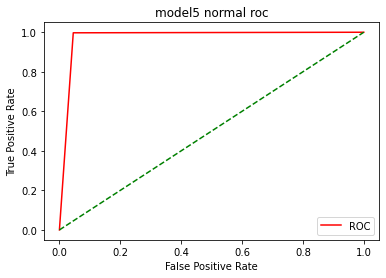

model5 normal roc auc score : 0.9758303146847934


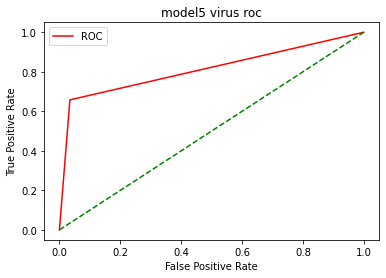

model5 virus roc auc score : 0.81176061796043


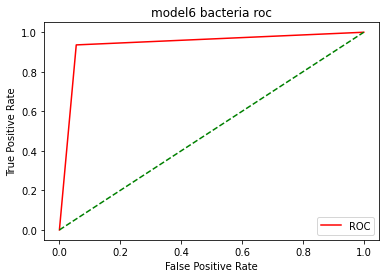

model6 bacteria roc auc score : 0.9403176273210682


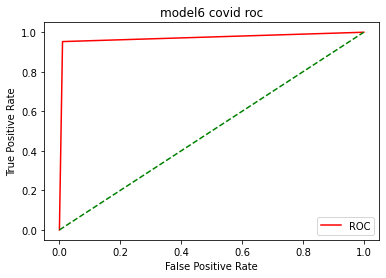

model6 covid roc auc score : 0.9712752108471269


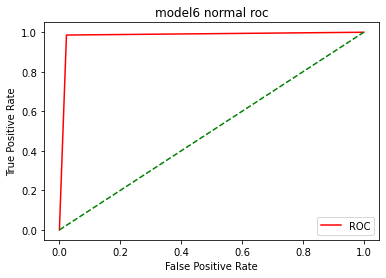

model6 normal roc auc score : 0.9813943174872919


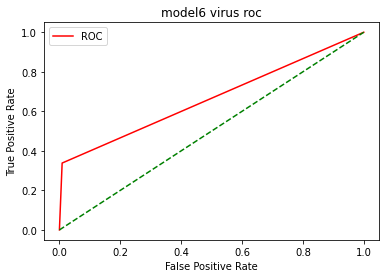

model6 virus roc auc score : 0.6646703377268587


In [21]:
b_y, b_p, c_y, c_p, n_y, n_p, v_y, v_p = trans_for_roc(y_200, predict1)
plot_roc_curves(b_y, b_p, c_y, c_p, n_y, n_p, v_y, v_p, title='model1')
b_y, b_p, c_y, c_p, n_y, n_p, v_y, v_p = trans_for_roc(y_200, predict2)
plot_roc_curves(b_y, b_p, c_y, c_p, n_y, n_p, v_y, v_p, title='model2')
b_y, b_p, c_y, c_p, n_y, n_p, v_y, v_p = trans_for_roc(y_256, predict3)
plot_roc_curves(b_y, b_p, c_y, c_p, n_y, n_p, v_y, v_p, title='model3')
b_y, b_p, c_y, c_p, n_y, n_p, v_y, v_p = trans_for_roc(y_200, predict5)
plot_roc_curves(b_y, b_p, c_y, c_p, n_y, n_p, v_y, v_p, title='model5')
b_y, b_p, c_y, c_p, n_y, n_p, v_y, v_p = trans_for_roc(y_200, predict6)
plot_roc_curves(b_y, b_p, c_y, c_p, n_y, n_p, v_y, v_p, title='model6')